In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from scipy.optimize import minimize as min
from collections import defaultdict

En la teoría de la información, un concepto central es la codificación de un mensaje. Un mensaje es generado por una fuente, y este mensaje se codifica para ser enviado por el canal y que el receptor pueda decodificarlo y reconstruir el mensaje original. Generalmente la un mensaje se representa a partir de una variable aleatoria $X$. La información de esta variable tiene que ser codificada por un alfabeto. El alfabeto representa los símbolos que el canal puede transmitir. Por ejemplo, en teoría de la computación, se suele trabajar con un alfabeto binario, de 0s y 1s. Esta forma de codificar es común. Pero también pueden existir otro tipo de codificaciones. Por ejemplo, el código morse responde a un alfabeto formado por un punto (dot) $.$, una marca de mayor longitud $-$ (dash) y un espacio. Este alfabeto responde a las capacidades físicas del canal de comunicación.

Una <b>codificación</b> $C$ para una variable aleatoria $X$ (mensaje) es un homomorfismo $C: X \to \Sigma^*$, tal que $\Sigma^*$ es el conjunto de cadenas (codewords) formadas a partir del alfabeto $\Sigma$.

La función $C$ de codificación es un homomorfismo entre monoides; esto quiere decir que cumple que para cualesquiera $x_i, x_j \in X$ se tiene que $C(x_i x_j) = C(x_i) \cdot C(x_j)$. Como trabajaremos con alfabetos y cadenas, la operación $\cdot$ representa la concatenación. De esta forma, una codificación de un conjunto de valores de una variable aleatoria es la concatenación de cada uno de estos valores. 

La codificación óptima de un mensaje responde a diferentes factores: idealmente, buscamos que la codificación permita una decodificación eficiente. Pero también buscaremos que las longitudes de las cadenas no sean excesivas. Para esto, introduciremos el concepto de longitud esperada. Esta longitud esperada tiene una relación particular con la entropía. Finalmente, veremos cómo estos conceptos pueden aplicarse al lenguaje, y a la estimación de modelos del lenguaje (de orden 1).



## Tipos de códigos

Supongamos que tenemos una variable aleatoria $X$ que puede tomar valores $x_1, x_2,..., x_N$. Por ejemplo, pueden representar edades, nombres o cualquier tipo de información que quiera transmitirse. Esta variable aleatoria representa un mensaje; este mensaje puede transmitirse a partir de un código. Un código estará determinado por un alfabeto $\Sigma$, a partir del cual buscaremos una forma eficiente de representar cada valor de la variable aleatoria. Un código (o $codeword$) para un valor $x_i$ es una cadena $s \in \Sigma^*$. Aquí $\Sigma ^*$ representa el conjunto de todas las cadenas que se pueden formar a aprtir del alfabeto $\Sigma$. Podemos denotar el código de $X=x_i$ como $C(x_i)$.

Para clarificar estos concepto, pongamos un ejemplo. Pensemos que tenemos una variable aleatoria $X$ representada por la pregunta ''¿De qué color es el gato?'', y supongamos que los posibles valores que puede tomar esta variable (las posibles respuestas) son: ''blanco'', ''amarillo'', ''gris'' y ''negro''. Ahora bien, si queremos transmitir esta información a aprtir de un código binario, es decir, si contamos con un alfabeto $\Sigma =\{0,1\}$, entonces tenemos que elegir cadenas de 0s y 1s que puedan interpretarse como los colores que puede tener el gato.

Una opción poco eficiente sería asignarle a todas las posibles respuestas a la variable $X$ el mismo símbolo; por ejemplo, todos los valores de la variable pueden estar representados por 0. Así, parato todo valor $x_i$ de X, tendremos que $C(x_i) =0$. Sin embargo, esta codificación es problemática pues quien reciba el código (el receptor) no podrá saber a que color está refiriéndose, no podrá decodificarlo. Este tipo de código se conoce como <b>código singular</b>, pues este tipo de codificación asigna un mismo código a más de un sólo valor del mensaje, lo que impide una decodificación correcta.

Para que el código pueda ser decodificado se requiere que sea <b>no singular</b>; es decir, que todo valor del mensaje tenga un código diferente. Por ejemplo, una codificación no singular para la variable $X$ que hemos propuesto podría ser:

* $C(blanco) = 0$
* $C(amarillo) = 010$
* $C(gris) = 01$
* $C(negro) = 10$

Aquí, cada valor de la variable tiene un código distinto. Sin embargo, esta codificación es problemática cuando se envía más de un valor. Por ejemplo, si queremos enviar un mensaje conjunto como $(gris, blanco)$, el código que se enviaría sería: $C(gris, blanco) = C(gris)C(blanco)=010$. Este código es el mismo que se utiliza para codificar el valor $gris$. Por tanto, cuando se envíe más de un valor, el receptor tendrá problemas con la decodificación. 

Para solucionar este problema, no basta con que cada valor del mensaje tenga un código distinto; queremos, además, que los códigos de las cadenas de valores (que llamaremos $extensiones$) tengan también una codificación distinta. Cuando esto pasa, se dirá que la codificación es <b>unívocamente decodificable</b>. Siguiendo con nuestro ejemplo, la siguiente codificación es unívocamente decodificable:

* $C(blanco) = 10$
* $C(amarillo) = 00$
* $C(gris) = 11$
* $C(negro) = 110$

En este caso, podemos ver que $C(gris, blanco) = C(gris)C(blanco)= 1110$ que no coincide ya con ningún otro código. En general se puede comprobar que, admeás de diferenciar cada valor con un código distinto, toda cadena de valores corresponderá a una sola cadena de códigos. 

Existe una restricción más que podemos pedirle al código. En el caso anterior $C(gris) =11$ es un prefijo de $C(negro) = 110$; es decir, el código del valor $gris$ aparece como una subcadena (a la izquierda) del código de $negro$. Si bien esto no impide que el receptor pueda decodificar adecuadamente el mensaje, genera una redundancia que rompe con la partición del código (lo que puede ser problemático en aplicaciones como los árboles de decisión). Idelamente, buscaremos que una codificación donde ningún código sea prefijo de otro. Una codificación en que ningún código es prefijo de otro se dice que es <b>instantáneo</b> (o libre de prefijos). De nuevo, retomando nuestro ejemplo, la siguiente codificación es instantánea:

* $C(blanco) = 0$
* $C(amarillo) = 10$
* $C(gris) = 110$
* $C(negro) = 111$

Esta codificación permite particionar el espacio de los valores de manera eficiente. Por ejemplo, si el primer valor es 0, sabremos con certeza que el valor es $blanco$, dejando de lado todos los otros valores. Si el valor es $1$, por su parte, hemos descartado el valor $amarillo$ y tendremos que leer el siguiente bit: si es 0 sabremos que el valor es $amarillo$. Si es 1 tenemos que pasar al último bit: ahora sólo veremos si el último bit es 0 o 1 para poder decidir el valor adecuado.

En resumen, tenemos los siguientes tipos de codificaciones: 

    1) singulares, donde más un valor del mensaje tiene un mismo código,

    2) no singulares, donde cada valor del mensaje tiene un código distinto,

    3) unívocamente decodificables, donde cada valor y cada cadena de valores tiene una codificación distinta,

    4) instantáneos, aquellos donde ningún código es prefijo de otro.

La siguiente tabla resume las codificaicones para la variable $X$.


In [4]:
codes = np.array([['0','0','10','0'],['0','010','01','10'],['10','00','11','110'],['0','10','110','111']])
pd.DataFrame(data=codes, index=['blanco','amarillo','gris','negro'], columns=['Singular', 'No singular', 'Unívocamente decodificable','Instantáneo'])

,Singular,No singular,Unívocamente decodificable,Instantáneo
blanco,0,0,10,0
amarillo,0,010,01,10
gris,10,00,11,110
negro,0,10,110,111



## Códigos óptimos

Una vez que hemos revisado los tipos de códigos propuestos en la teoría de la información, debemos determinar qué características debe tener una codificación óptima. 

Cuando se envía un mensaje, se busca que el código enviado sea fácilmente decodificable; esto implica que el código sea idealmente instantáneo (o al menos unívocamente decodificable). Asimismo, es ideal que el código sea lo más corto posible.  Es decir, buscamos la codificación más pequeña que sea fácilmente decodificable.

La longitud del código será, entonces, un factor importante para la codificación. Idealmente buscamos que la codificación sea la más corta posible. Idealmente, los elementos más frecuentes podrán ser codificados a partir de un número menor de símbolos, mientras que elementos menos frecuentes requerirán de una longitud mayor. Es decir, la longitud de los códigos dependerán de las probabilides de los elementos que se codifican. 

Sea entonces $p_i = p(X=x_i)$ la probabilidad de que el mensaje corresponda al elemento $x_i$, y sea $l_i = |C(x_i)|$ la longitud del código para $x_i$ bajo la codificación $C$. Por tanto, una probabilidad $p_i$ mayor implicará una longitud de código $l_i$ menor y visceversa. Un ejemplo típico de este uso de una codificación óptima es el código Morse. El código Morse cuenta con un alfabeto que incluye los símbolos de punto '$\cdot$', línea '$-$' y espacio ' '. El código Morse busca codificar los caracteres utilizados en el idioma inglés, es decir, las letras 'a', 'b', 'c', hasta 'z'. En inglés la letra más frecuente es la 'e', por lo que el código para esta letra es el más simple, el punto '$\cdot$'. Otra letra bastante frecuente es la 't', que se codifica con la línea '$-$'. Las letras con mayor probabilidad tienen la menor longitud.

La forma en que podemos medir, en promedio, que tan adecuada es la codificación en términos de longitud es a partir de la longitud esperada. La longitud esperada, $L$, es la esperanza de las longitudes. Ésta se expresa como:

$$L = \sum_i p_i l_i$$

La longitud esperada es sumamente importante para la codificación, pues buscaremos que, idealmente, esta sea lo más pequeña posible. De esta forma, los elementos con mayor probabilidad ($p_i$ alto) tendrán una longitud pequeña ($l_i$ bajo) y los elementos con poca probabilidad, podrán codificarse con mayor longitudes. La longitud esperada es entonces un indicador de esto.

Como mencionamos, una forma óptima de codificación es la de los códigos instantáneos. Este tipo de códigos cumple una desigualdad, la desigualdad de Kraft, que los relaciona con la longitud de sus códigos.

<b>Desigualdad de Kraft</b>: Para cualquier código instantáneo con alfabeto de tamaño $N$ y longitudes $l_i, i=1,...,m$ se cumple la desigualdad:

$$\sum_{i} N^{-l_i} \leq 1$$

Demostrar esta desigualdad no es difícil y conlleva conceptualizar los códigos instantáneos de una forma bastante útil. Considérese un árbol $N$-ario, esto es, un árbol donde cada nodo cuenta con $N$ hijos. Entonces los nodos representarán los códigos $C(x_i)$ y las aristas representan los símbolos del alfabeto que bastan para componer el código $C(x_i)$. El ejemplo más sencillo sería tomar un alfabeto binario $\Sigma = \{0,1\}$; entonces determinaremos un árbol binario. Si quisieramos representar, por ejemplo, la codificación binaria del ejemplo anterior para los colores del gato, tendríamos una raíz que se divide en dos hijos, el primero llegaría a un nodo con el código 0, correspondiente a $C(blanco)$, del otro lado se tendría una rama con un 1, que a su vez se dividiría en dos ramas, una con un 0 que llevaría al código 10, y otra que debe dividirse en otras ramas para llegar a los códigos faltantes 110 y 111.

Este ejemplo deja ver que, ya que estamos tratando con códigos instantáneos, no existe en el árbo $N$-ario ningún código $C(x_i)$ que tenga hijos; es decir, todos los códigos que representan a los valores de la variable aleatoria deben ser hojas del árbol. Ahora bien, si tomamos $l_{máx} = \max l(x)$ la longitud más grande de los códigos que tenemos. Si consideramos todos los códigos al nivel $l_{máx}$ estaremos en la parte más profunda del árbol; es decir, no abrá códigos que se encuentren más abajo, aunque pueden haber códigos al mismo nivel. En el ejemplo anterior $l_{más} = 3$, pues los códigos con mayor longitud (110 y 111) tienen longitud 3. 

Si consideramos los códigos a nivel $l_i$, veremos que una cadena a este nivel tendrá $N^{l_{máx}-l_i}$ descendientes. Por ejemplo, con el ejemplo anterior, si consideramos $l_i=2$ (el nivel del código 10), como tenemos un alfabeto binario tendremos $2^{3-2} = 2^1 = 2$ descendientes (que son precisamente los códigos 110 y 111). Obsérvese que el número total de nodos en cualquier nivel es menor que $D^{l_{máx}}$, esto implica que si sumamos los descendientes en cada nivel, tendremos la desigualdad:

$$\sum_i D^{l_{máx}-l_i} \leq D^{l_{máx}}$$

Pero la parte de la izquierda puede reescribirse como $\sum_i D^{l_{máx}-l_i} = D^{l_{máx}} \sum_i D^{-l_i}$ y dividiendo entre $D^{l_{máx}}$ de ambos lados de la desigualdad obtenemos la desigualdad de Kraft.

Esta desigualdad es importante pues también su inverso es verdadero; es decir, si tenemos un conjunto de longitudes de códigos $l_1,...,l_m$ que cumple la desigualdad de Kraft, podemos construir un código con esas longitudes. La estrategia para construir este código se basa en la construcción del árbol que hemos utilizado para la demostración del resultado.


Ahora podemos combinar las dos formulaciones que tenemos (la longitud esperada y la desigualdad de Kraft) para buscar una codificación óptima. Queremos que la longitud esperada $L$ sea lo más pequeño posible, sujeto a que se cumpla la desigualdad de Kraft (para garantizar que podremos encontrar una codificación instantánea). Utilizando multiplicadores de Lagrange, podemos definir una función objetivo como:

$$J =  \sum_i p_i l_i + \lambda \sum_i N^{-l_i}$$

El objetivo, entonces, será encontrar las longitudes $l_1, l_2,..., l_m$ que minimicen esta función objetivo. tendremos que diferenciar con respecto a $l_i$ y así obtendremos las derivadas parciales:

$$\frac{\partial J}{\partial l_i} = p_i - \lambda N^{-l_i} \log N$$

Si igualamos estas derivadas a 0 y despejamos $N^{-l_i}$, tendremos que:

$$N^{-l_i} = \frac{p_i}{\lambda \log N}$$

Podemos tomar $\lambda = \frac{1}{\log N}$ de tal forma que obtenemos que $N^{-l_i} = p_i$. Si despejamos ahora $l_i$ de esta última ecuación, obtendremos que la longitud óptima está dada por:

$$l_i^* = -\log_N p_i$$

Esta fórmula refiere a la información. Por ejemplo, si el alfabeto es binario ($N=2$) la longitud óptima es $l_i^* = -\log_2 p_i$ bits. Más aún, si tenemos una codificación óptima, donde todos las longitudes son $-\log_N p_i$, entonces tenemos que la longitud esperada es:

$$L^* = \sum_i p_i l_i^* = -\sum_i p_i \log_N p_i = H_N(X)$$

Es decir, la longitud esperada de un código óptimo es igual a la entropía (en base $N$) de la variable aleatoria que se esta codificando. 

Si bien muchas veces no se podrá alcanzar un código óptimo, pues para esto se requiere que $-\log_N p_i$ sea un entero. En su defecto, podríamos tomar el entero menor que sea más grande que $-\log_N p_i$. Pero de este resultado podemos obtener un corolario interesante. Ya que la longitud esperada es igual a la entropía si y sólo si las longitudes de la codificacion minimizan esta longitud, entonces tenemos que la entropía es una cota inferior para la longitud esperada. Esto es:

$$H_N(X) \leq L$$

Sólo si el código es instantáneo y las longitudes son iguales a $-\log_N p_i$ se tendrá la igualdad. 

## El lenguaje natural

El lenguaje natural puede ser pensado como un código que codifica significados. Pero podemos preguntarnos si algo de la teoría de la información que hemos discutido se aplica a este. ¿Es el lenguaje natural un código óptimo? En general, la respuesta es no, pues podemos encontrar que, para empezar, el lenguaje natural no es un código instantáneo. Existen palabras que tiene como prefijos (en un sentido de teoría de la información) a otras palabras. Así, la palabra 'lata' contiene como prefijo a la palabra 'la'. 

Podríamos preguntarnos si es unívocamente decodificable, lo que tampoco parece ser cierto, al menos que asumamos (como se ha asumido desde los análisis formalistas) que una oración distinta tiene siempre un significado distinto. De igual forma, podemos pensar que el lenguaje natural es no singular si asumimos que no existen sinónimos perfectos.

Si bien, hablar de un tipo de codificación del lenguaje natural es complicada y requiere de investigaciones sobre el significado, podemos explorar esta codificación en término de las longitudes de sus códigos. Es decir, en términos de las longitudes de las palabras. 

Para llevar esto a cabo, usaremos el Corpus de la Real Academia de la lengua o corpus CREA que se puede consultar en http://corpus.rae.es/creanet.html. Este corpus cuenta con un tola de 737 799 palabras diferentes (o tipos), que suman un total de 152 558 294 apariciones (o tokens). Las palabras con mayor frecuencias y aquellas con menor se pueden ver a continuación:

In [18]:
corpus_freqs = pd.read_csv('crea_frecs.txt', delimiter=' ')
N = len(set(chain(*[list(str(w)) for w in corpus_freqs['word'].to_list()])))

In [12]:
corpus_freqs.rename(columns={'freq':'Frecuencia', 'word':'Palabra'})[:100001]

,Frecuencia,Palabra
0,9999518,de
1,6277560,la
2,4681839,que
3,4569652,el
4,4234281,en
...,...,...
99996,31,exfuncionarios
99997,31,exhibirlo
99998,31,eximia
99999,31,exitos


Como puede observarse, la palabra más frecuentes es 'de' que tiene casi 10 millones de apariciones. En general, podemos ver que las palabras más frecuentes son palabras funcionales: palabras que no cuentan con un significado específico y que sirven más bien para relacionar otras palabras. Estas palabras también tienen una longitud pequeña. Las primeras 5 palabras que podemos ver en la lista tienen longitud 2, excepto por 'que' que tiene longitud 3. 

Si observamos las palabras menos frecuentas (las que se encuentrar en los lugares más bajos de la lista) podemos ver que la longitud de las palabras es mayor. Esto nos dice que de cierta forma, el lenguaje natural sí busca codificar las pallabras con mayor probabilidad a partir de códigos de longitud pequeña, mientras que las palabras con poca probabilidad pueden tener longitud más larga. Es decir, parece que el lenguaje natural cumple, en cierta proporción, el minimizar la longitud esperada.

En este caso, no podemos modificar la codificación, pues las palabras ya están determinadas. Entonces, no podremos minimizar la longitud esperada a partir de encontrar longitudes de código óptimas. Sin embargo, podemos utilizar el concepto de longitud esperada en una aplicación relevante: la estimación de probabilidades de palabras. Para esto repasaremos unos conceptos previos.

### Distribución de Zipf

Se conoce como Ley de Zipf a una ley empírica del lenguaje que nos dice que la frecuencia $f$ de una palabra $w$ es inversamente proporcional a su rango estadístico. El rango estadístico es la posición que la palabra ocupa en una lista de acuerdo con su frecuencia. Así, la palabra más frecuente tendrá el rango 1, la segunda más frecuente el rango 2, etc. Por ejemplo, en el CREA, la palabra 'de' tiene rango 1, mientras que la palabra 'que' tiene rango 3. Entonces la Ley de Zipf nos dice que:

$$f(w_r) \propto r^{-\alpha}$$

donde $f(w_r)$ es la frecuencia de la palabra con el rango $r$. Además $\alpha$ es un parámetro de ajuste, que tendrá gran importancia y revisaremos más adelante.

Antes de pasar a otra cosa, debemos mencionar es que una de las propiedades interesantes de la Ley de Zipf es que la escala logarítmica 'lineariza' los datos. Esto es claro, pues si obtenemos el logaritmo de ambos lados de la ecuación, tendremos que:

$$\log f(w_r) = -\alpha \log r + \beta$$

Recordemos que la proporcionalidad $\propto$ implica que existe una constante que al multiplicar el lado derecho da la igualdad. Es decir, $f(w_r) \propto r^{-\alpha}$ implica que existe una constante $c$ tal que $f(w_r) = c r^{-\alpha}$. En la ecuación logarítmoca, entonces, $\beta = \log c$ es una traslación.
El menos indica que la pendiente de la recta es negativa, es decir, que la función es descendiente. 

En los datos del CREA podemos ver que la Ley de Zipf empíricamente. La siguiente gráfica muestra que, en efecto, hay la relación del logarítmo de las frecuencias y el logarítmo del rango es descendiente. 

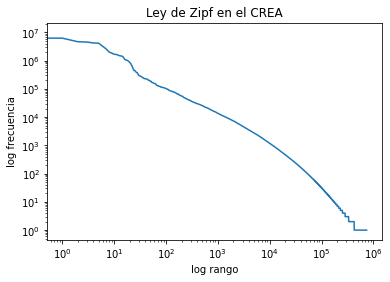

In [16]:
corpus_freqs['freq'].plot(loglog=True, legend=False)
plt.title('Ley de Zipf en el CREA')
plt.xlabel('log rango')
plt.ylabel('log frecuencia')
plt.show()

Si bien, no se describe una recta perfecta, se puede ver que los datos empíricos pueden aproximarse a aprtir de una recta. De hecho, la fórmila que hemos determinado con los logaritmos $\log f(w_r) = -\alpha \log r + \beta$, se parece mucho al problema de la regresión lineal si tomamos $y=\log f(w_r)$ y $x=\log r$ tenemos, en efecto, un problema de regresión lineal. Resolver este problema de regresión lineal, de hecho, nos dará el valor de $\alpha$. 

De esta forma, podemos interpretar a $\alpha$ como la pendiente de la recta descrita por la Ley de Zipf, o bien como una parámetro de ajuste para que a partir de los rangos podamos encontrar la frecuencia. Resolvamos entonces el probelma de regresión lineal a partir de los mínimos cuadrados. Tendremos entonces una función objetivo dada por:

$$J_{MSE} = \sum_r (\log f(w_r) - (-\alpha \log r + \beta))^2$$

En este caso, $\beta$ es conocido y corresponde al logaritmo de la frecuencia más alta; es decir, $\beta = \log fr(w_1)$, este valor permite que la recta determine de manera precisa la frecuencia de la palabra con el rango 1, pues cuando $r=1$ entonces $\log r = 0$, por lo que $-\alpha \log 1 + \log f(w_1) = -\alpha 0 + \log f(w_1) = \log f(w_1)$. De esta forma, al menos podemos estimar la frecuencia de la palabra de rango 1 con error 0. 

In [14]:
ranks = np.array(corpus_freqs.index)+1
frecs = np.array(corpus_freqs['freq'])

#Función de minimización
func = lambda a: sum(((a*np.log(ranks) + np.log(frecs[0]))-np.log(frecs))**2)
#Inicialización
a0 = 1

#Minimización
a_hat = min(func, a0).x[0]

print('valor:',a_hat, '\nMSE:',func(a_hat))

valor: -1.1812227863539415 
MSE: 323481.1807174574


Al resolver este problema para los datos del CREA obtenemos que:

$$\alpha = 1.181227$$

Este valor de $\alpha$ es el parámetro que ajusta con un error mínimo una recta a los datos empíricos. Gráficamente, podemos ver que esta recta pasa muy cerca de los datos empíricos, sin ser igual a ellos. Es decir, existe un error, pero esto no es del todo malo, de hecho puede traer ventajas de generalización. Como veremos más adelante, esto, de hecho, es una mejor estimación.

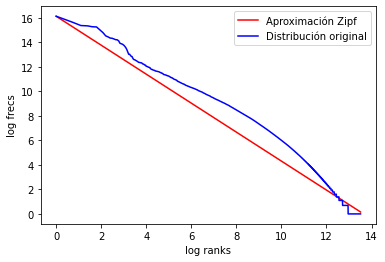

In [5]:
plt.plot(np.log(ranks),a_hat*np.log(ranks)+ np.log(frecs[0]), color='r', label='Aproximación Zipf')
plt.plot(np.log(ranks),np.log(frecs), color='b', label='Distribución original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Finalmente, debemos señalar que estimar esta recta, que es lo mismo que estimar el parámetro $\alpha$ tiene aplicaciones para estimar las probabilidades de las palabras.

Cuando hablamos de la distribución de Zipf, precisamente hacemos referencia a una distribución estadística que parte de la Ley de Zipf. En general, la probabilidad de una palabra con rango $r$, que expresamos como $p_r = p(X=r)$ está dada por:

$$p_r = \frac{r^{-\alpha}}{\sum_{k=1}^m k^{-\alpha}}$$

Donde $m$ es el número de palabras diferentes. Generalmente a $\sum_{k=1}^m k^{-\alpha}$ se le llama <b>función de partición</b> y puede verse como una versión finita de la función zeta de Riemann. 


### Otras distribuciones

Esta no es la única forma en que podemos estimar las probabilidades de las palabras, una forma muy común es a partir de una función de probabilidad frecuentista (la frecuencia relativa), donde la probabilidad está dada como:

$$p_r = \frac{f(w_r)}{\sum_k f(w_k}$$

Esta es una forma muy conocida de calcular probabilidades. Sin embargo, existe también otras propuestas para estimar la probabilidad de palabras.

Benoit Mandelbrot, por ejemplo, extiende la Ley de Zipf a la que se conoce como <b>Ley de Mandelbrot-Zipf</b> o simplemente Ley de Mandelbro. Esta es una generalización de la Ley de Zipf, que nos dice que:

$$f(w_r) \propto \frac{B}{(r+\rho)^\alpha}$$

Esta ecuación ajusta mejor a los datos empíricos pues el termino $(r+\rho)$ permite cierta curvatura. Asimismo, si $B=1$ y $\rho=0$ obtendremos la Ley de Zipf como la hemos enunciado anteriormente.

De nuevo, a partir de los datos del CREA podemos ver como se comporta la aproximación de Mandelbrot con respecto a los datos empíricos. Elijamos entonces $B=3$ y $\rho=2$. Tomamos $\alpha = 1.181227$, como en el caso de Zipf. La siguiente gráfica muestra tanto la aproximación de Mandelbrot como la de Zipf.

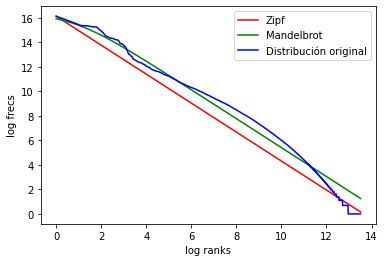

In [6]:
plt.plot(np.log(ranks),a_hat*np.log(ranks)+ np.log(frecs[0]), color='r', label='Zipf')
plt.plot(np.log(ranks),a_hat*np.log((ranks+2))+ np.log(3*frecs[0]), color='g', label='Mandelbrot')
plt.plot(np.log(ranks),np.log(frecs), color='b', label='Distribución original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

De igual forma que con Zipf, podemos obtener una función d eprobabilidad a partir de la función de Mandelbrot. Esta estará dada por:

$$p_r = \frac{B/(r+\rho)^\alpha}{Z}$$

Donde $Z = \sum_k \frac{B}{(k+\rho)^\alpha}$ es la función de partición. 

Generalmente a la estimación de estas probabilidades se les conoce como <b>modelos del lenguaje</b>. Un modelo del lenguaje consiste en la descripción de un lenguaje natural a partir de probabilidades. La idea de los modelos del lenguaje es aproximar probabilidades de cadenas a partir de la factorización de sus elementos. En este caso, diremos que nuestra aproximación es de orden 1. Es decir, estimamos probabilidades de palabras asumiendo independencia. Para Shannon (1948) existen aproximaciones de mayor orden: una aproximación de orden 2 aproxima las probabilidades a partir de secuencias de dos palabras, y se conoce comunmente como modelo de bigramas. 

En nuestro caso, estimar la probabilidad de una sola palabra ya parece complicado, especialmente cuando tenemos diferentes formas de estimar la probabilidad de la palabra. ¿Cuál de estas funciones de probabilidad será mejor? Para responder esto podemos hacer uso de los conceptos de la teoría de la información.

### Estimación de una distribución que minimice la longitud esperada

Como hemos mencionado, para la teoría de información un código óptimo es aquel que minimiza la longitud esperada. También hemos mencionado que esperamos que se cumpla la desigualdad de Kraft para asegurar que tenemos una codificación instantánea. Sin embargo, ya hemos visto que el lenguaje natural no es un código instantáneo. De hecho, para los datos del CREA tenemos que:

$$\sum_r N^{-l_r} = 1.330995$$

Donde $N =59$ es el número de caracteres presentes en las palabras; es decir, estamos trabajando con un alfabeto de longitud $N=59$. Vemos entonces que de hecho $\sum_r N^{-l_r}$ es mayor a 1; esto precisamente ya nos indica que no se trata de un código instantáneo.

Sin embargo, con los datos que contamos de lenguaje natural si podemos reducir la longitud esperada. En primer lugar, veamos cuáles son las longitudes de las palabras con las que estamos trabajando:

In [19]:
probs_frec = frecs/frecs.sum()
r_a = ranks**a_hat
probs_zipf = r_a/r_a.sum()
fM = 3*(ranks+2)**a_hat 
probs_mand = fM/fM.sum()

H_zipf = -np.dot(probs_zipf, np.log2(probs_zipf)/np.log2(N))
H_mand = -np.dot(probs_mand, np.log2(probs_mand)/np.log2(N))
H_frec= -np.dot(probs_frec, np.log2(probs_frec)/np.log2(N))

ls = [len(str(w)) for w in corpus_freqs['word'].to_list()]

L_zipf = np.dot(ls,probs_zipf)
L_mand = np.dot(ls, probs_mand)
L_frec = np.dot(ls,probs_frec)

In [8]:
L = pd.DataFrame(data=ls, index=ranks, columns=['Longitud'])
L['Palabra'] = corpus_freqs['word'].to_list()
L['Frecuentista'] = probs_frec
L['Zipf'] = probs_zipf
L['Mandelbrot'] = probs_mand

In [9]:
L[:100001]

,Longitud,Palabra,Frecuentista,Zipf,Mandelbrot
1,2,de,6.554555e-02,1.775736e-01,6.518513e-02
2,2,la,4.114860e-02,7.830596e-02,4.640535e-02
3,3,que,3.068885e-02,4.850559e-02,3.565297e-02
4,2,el,2.995348e-02,3.453117e-02,2.874518e-02
5,2,en,2.775517e-02,2.653011e-02,2.395995e-02
...,...,...,...,...,...
99997,14,exfuncionarios,2.032010e-07,2.204346e-07,2.962281e-07
99998,9,exhibirlo,2.032010e-07,2.204320e-07,2.962246e-07
99999,6,eximia,2.032010e-07,2.204294e-07,2.962211e-07
100000,6,exitos,2.032010e-07,2.204268e-07,2.962176e-07


En la tabla anterior, vemos el rango, la longitud, la palabra y las tres funciones de probabilidad que podemos estimar: la frecuentista, Zipf y Mandelbrot. Una forma de determinar que función de probabilidad es mejor es a partir de buscar aquellas probabilidades que minimicen la longitud esperada. Es decir, en lugar de buscar las longitudes óptimas, buscaremos las probabilidades que hagan que la función

$$L = \sum_r p_r l_r$$

sea lo más pequeña posible, aquí $l_r$ es la longitud de la palabra con el rango $r$.

Para ver cómo se comportan las funciones de probabilidades que hemos determinado con respecto a las longitudes de palabra, podemos ver la probabilidad acumulada por longitud dada para cada distribución.

En el caso de la probabilidad frecuentista, las propbababilidades acumuladas se comportan de la siguiente forma:

In [20]:
zipf = defaultdict(list)
mle = defaultdict(list)
mand = defaultdict(list)
for i,l in enumerate(ls):
    zipf[l].append(probs_zipf[i])
    mle[l].append(probs_frec[i])
    mand[l].append(probs_mand[i])

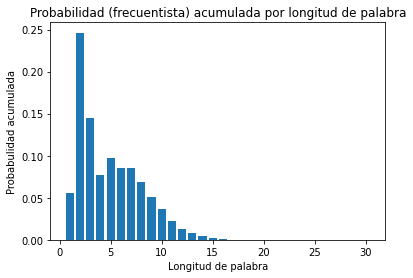

In [21]:
Z = np.array([[l,sum(p)] for l,p in mle.items()])
plt.bar(Z[:,0], Z[:,1])
plt.title('Probabilidad (frecuentista) acumulada por longitud de palabra')
plt.xlabel('Longitud de palabra')
plt.ylabel('Probabulidad acumulada')
plt.show()

En el caso de la probabilidad de Zipf, tenemos:

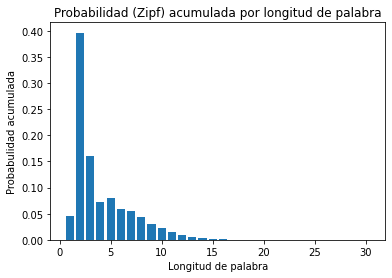

In [12]:
Z = np.array([[l,sum(p)] for l,p in zipf.items()])
plt.bar(Z[:,0], Z[:,1])
plt.title('Probabilidad (Zipf) acumulada por longitud de palabra')
plt.xlabel('Longitud de palabra')
plt.ylabel('Probabulidad acumulada')
plt.show()

Finalmente, para la probabilidad de Mandelbrot las probabilidades acumuladas se comportan de la siguiente manera:

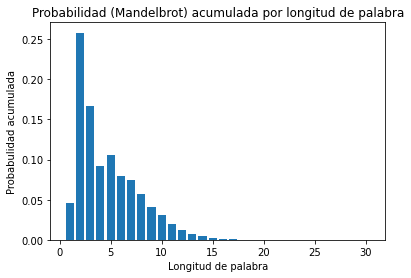

In [22]:
Z = np.array([[l,sum(p)] for l,p in mand.items()])
plt.bar(Z[:,0], Z[:,1])
plt.title('Probabilidad (Mandelbrot) acumulada por longitud de palabra')
plt.xlabel('Longitud de palabra')
plt.ylabel('Probabulidad acumulada')
plt.show()

En todos los casos podemos ver que las probabilidades se acumulan principalmente en las palabras de longitud 2. Es decir, en los datos las palabras de longitud 2 son las que más abundan. Asimismo, las probabilidades son bajas en las palabras de mayor longitud. Esto nos hace ver que el lenguaje natural tiene propiedades similares a los códigos de la teoría de la información: los elementos más probables suelen tener las longitudes más cortas, mientras que los menos probables muestran mayor longitud.

Ahora bien, para poder determinar que función de probabilidad puede ser útil para describir los datos, bastará ver el valor de la longitud esperada para cada una de estas probabilidades estimadas. El siguiente cuadro muestra la longitud esperada y la entropía:

In [14]:
pd.DataFrame(data =[[H_frec, L_frec], [H_zipf, L_zipf], [H_mand, L_mand]] ,index=['Frecuentista', 'Zipf', 'Mandelbrot'], columns=['Entropía', 'Longitud esperada'])

,Entropía,Longitud esperada
Frecuentista,1.845856,4.902205
Zipf,1.519773,4.029848
Mandelbrot,1.803004,4.674181


Como podemos ver, la probabilidad estimada a partir de Zipf es la que tiene menor longitud esperada. La longitud esperada más alta se alcanza por la probabilidad frecuentista. En este sentido, la probabilidad de Zipf parece una mejor forma de estimar las probabilidades. Asimismo, podemos ver que la entropía de Zipf es la más pequeña, lo que no es raro, pues hemos mostrado que la entropía es una cota inferior de la longitud esperada.

Cabe mencionar que la estimación por medio de la distribución de Zipf es más sencilla de estimar que la de Mandelbrot. Podríamos buscar los parámetros $B, \rho$ y $\alpha$ que hicieran la longitud esperada más pequeña, sin embargo, esto representa una tarea más complicada que estimar el único parámetro de la función de Zipf.

De esta forma, podemos ver que los conceptos de la teoría de información pueden tener aplicaciones prácticas en la lingüística cuantitativa y la lingüística computacional. En general, en la práctica se utilizan modelos del lenguaje de mayor orden, y para evaluar su adecuación se utilizan medidas basadas en entropía como la perplejidad ($2^{H(X)}$). En el caso de las estimación de probabilidades de palabras la longitud esperada puede ser un buen indicador, y la función de Zipf una buena aproximación, que además resulta fácil de estimar.